# Inspect variable importance of factor using andom forest sklearn

In [31]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn import  preprocessing
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Load dataset

In [17]:
from sklearn import datasets
boston = datasets.load_boston()
train = pd.DataFrame(boston.data, columns=boston.feature_names)
train["PRICE"] = boston.target

display(train.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data profiling

| CRIM       | ZN               | INDUS              | CHAS                                    | NOX     | RM               | AGE                              | DIS                                         | RAD                            | TAX                         | PTRATIO            | B                            | LSTAT          |
|------------|------------------|--------------------|-----------------------------------------|---------|------------------|----------------------------------|---------------------------------------------|--------------------------------|-----------------------------|--------------------|------------------------------|----------------|
| 犯罪発生率 | 住居区画の密集度 | 非小売業の土地割合 | チャールズ川 (1: 川の周辺, 0: それ以外) | NOx濃度 | 住居の平均部屋数 | 1940年より前に建てられた物件割合 | 5つのボストン市の雇用施設からの重み付き距離 | 大きな道路へのアクセスしやすさ | $10,000ドルあたりの所得税率 | 教師あたりの生徒数 | 黒人の比率 1000(Bk – 0.63)^2 | 低所得者の割合 |

In [18]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

Number of variables,14
Number of observations,506
Total Missing (%),0.0%
Total size in memory,55.4 KiB
Average record size in memory,112.2 B
Numeric,12
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,1


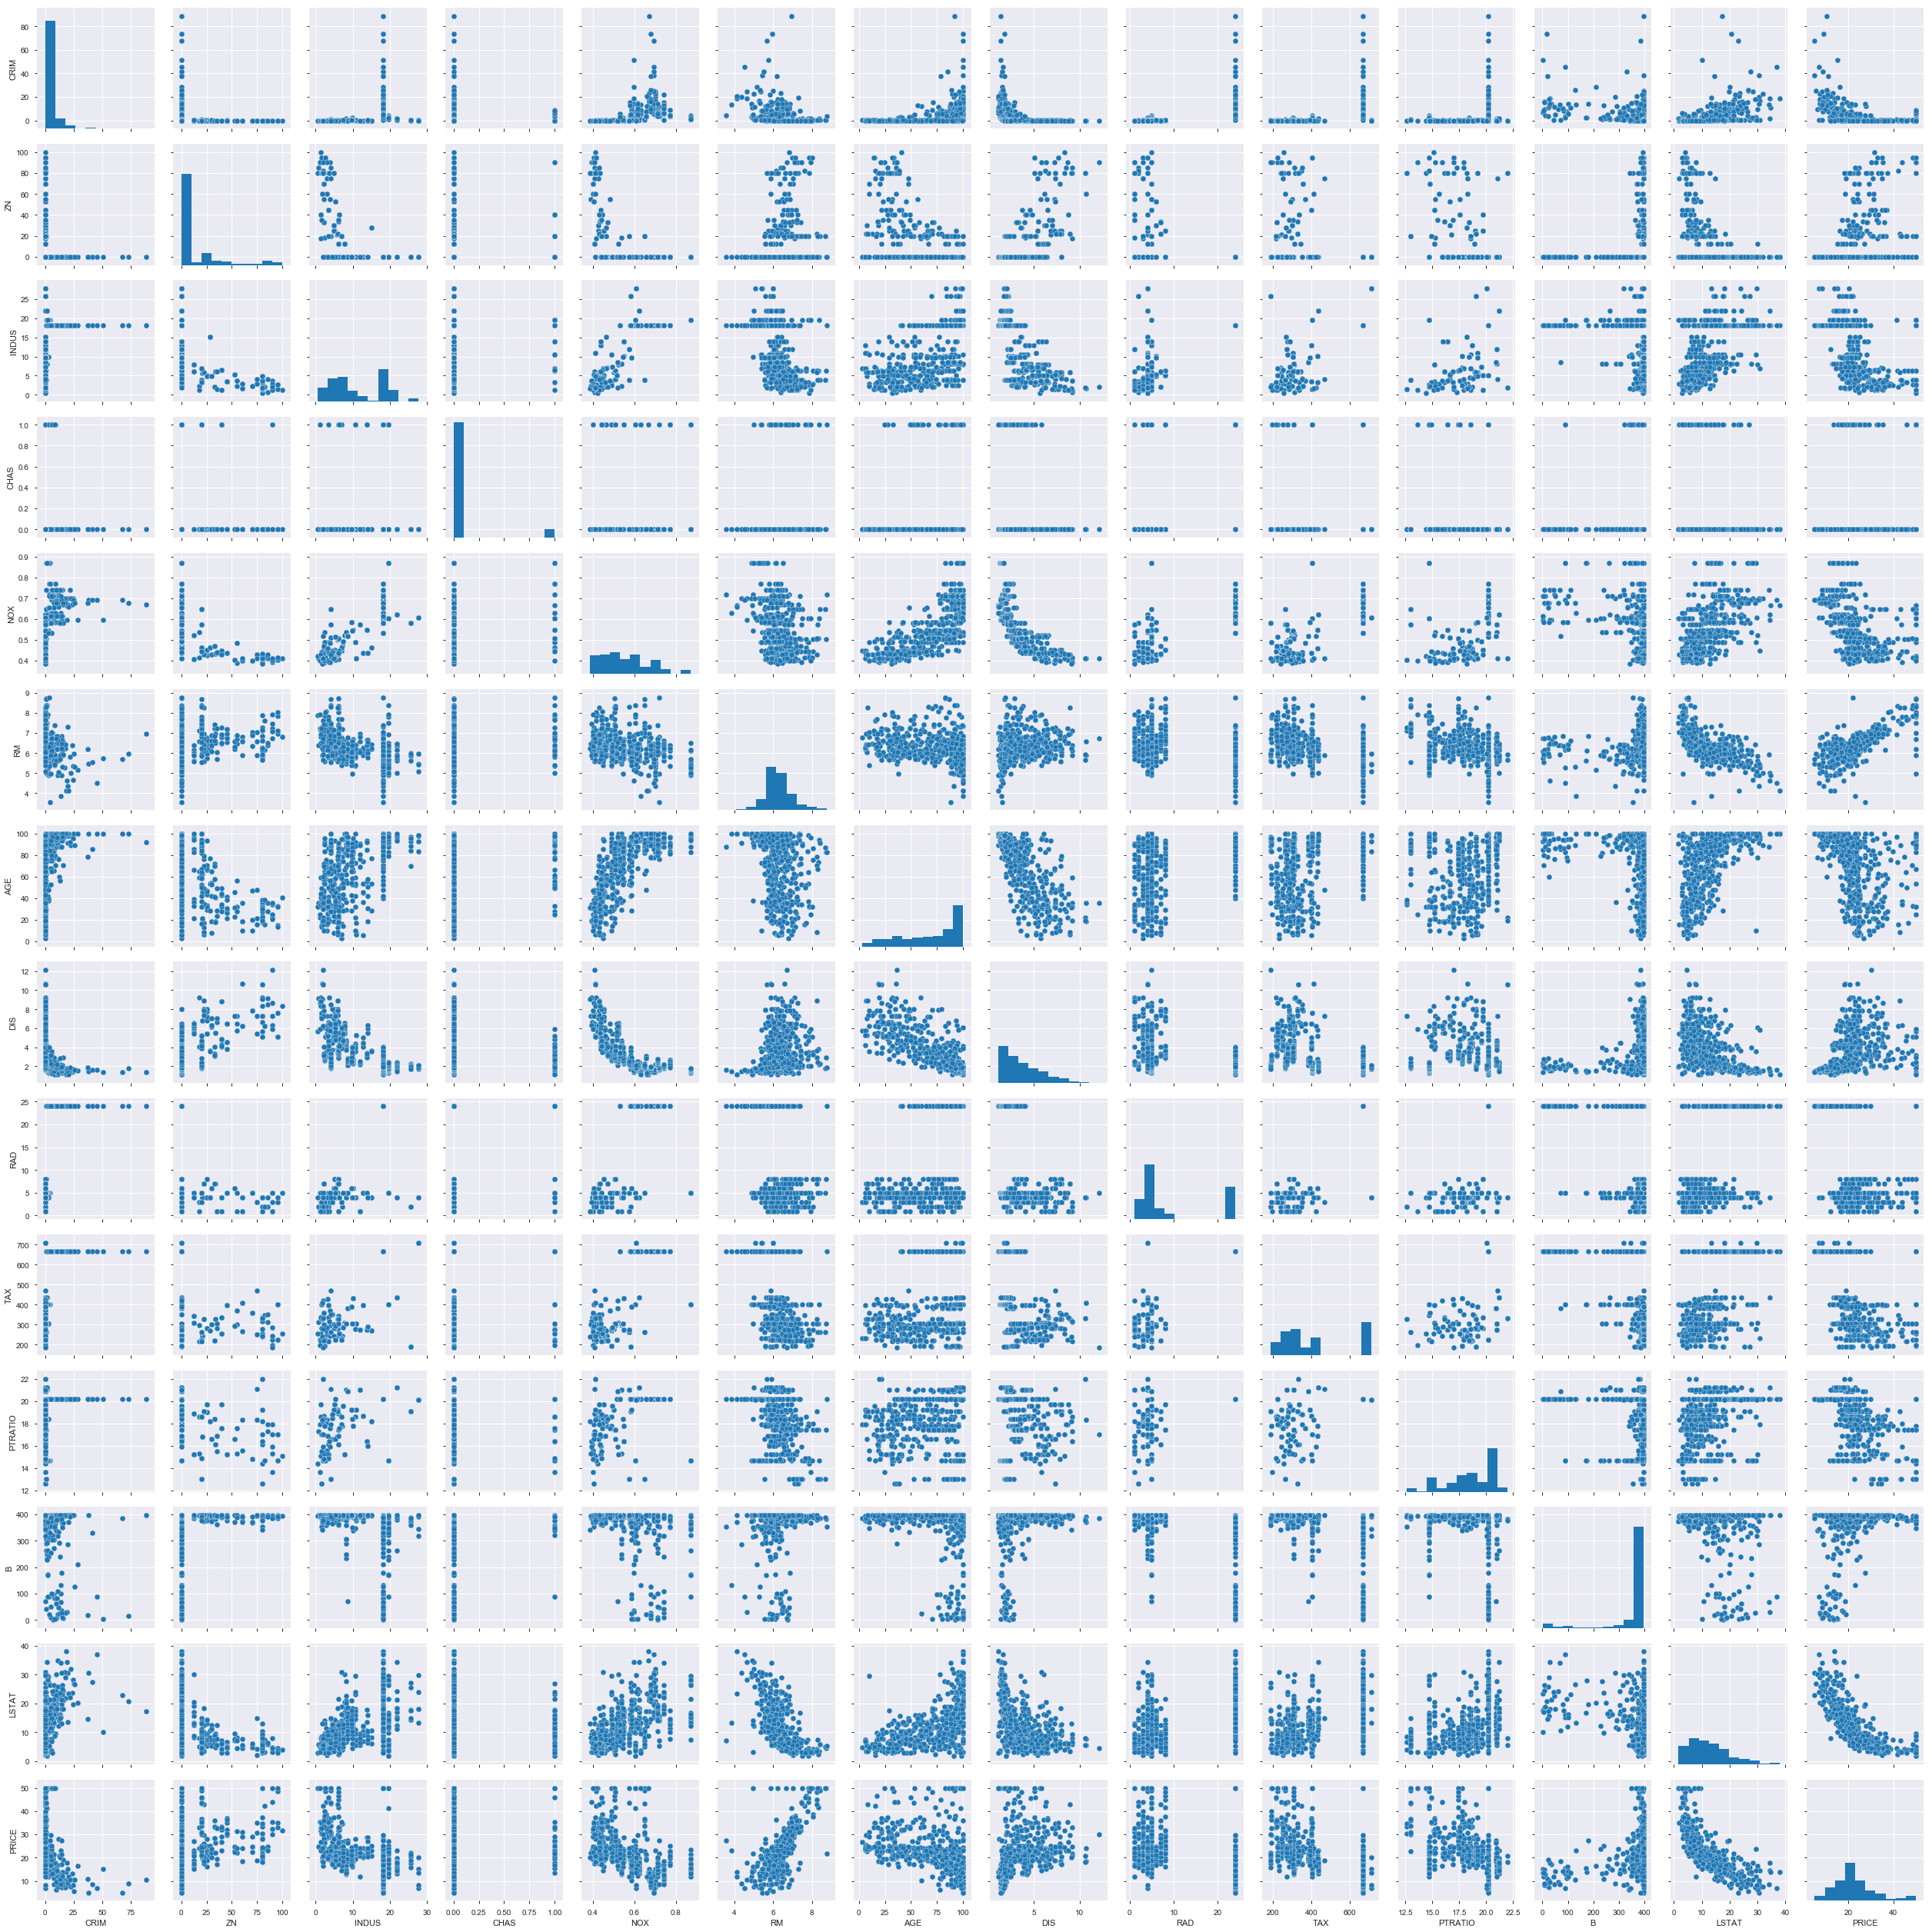

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(train)

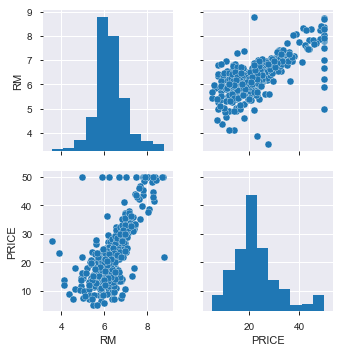

In [29]:
sns.pairplot(train[['RM', 'PRICE']])

In [30]:
np.corrcoef (train['RM'], train['PRICE'])[0,1] # 部屋数 との相関関係数

0.6953599470715394

In [32]:
display(train.isnull().sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

## Import the random forest model

In [35]:
## Fit the model on your training data.
X = train.drop(["PRICE"], axis=1)
y = train["PRICE"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)


rf = RandomForestRegressor()
rf.fit(train_X, train_y)

## And score it on your testing data.
rf.score(test_X, test_y)
feature_importances = pd.DataFrame(rf.feature_importances_, index = train_X.columns, columns=['importance']).sort_values('importance', ascending=False)

## Results
display(feature_importances)

,importance
LSTAT,0.441001
RM,0.368962
DIS,0.052970
CRIM,0.048003
PTRATIO,0.018272
AGE,0.015934
NOX,0.014888
TAX,0.012459
B,0.011047
INDUS,0.007585


## 平均二乗誤差（MSE） 

In [42]:
train_y_pred = rf.predict(train_X)
test_y_pred = rf.predict(test_X)

from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(train_y, train_y_pred), mean_squared_error(test_y, test_y_pred)) )
# R^2の計算
from sklearn.metrics import r2_score
print('MSE train : %.3f, test : %.3f' % (r2_score(train_y, train_y_pred), r2_score(test_y, test_y_pred)) )


MSE train : 2.293, test : 9.745
MSE train : 0.974, test : 0.867
